**Objective:** Implement a simple ann (artificial neural network)

***Preprocessing***

**1.) Importing the necessary modules** 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import  transforms

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder

**2.) Importing the dataset**

In [2]:
data=pd.read_csv(r"C:\Users\Devab\OneDrive\Desktop\Coding\ML-DL\Deep Learning\Applications\Basic ANN\Customer Churn Prediction\Churn_Modelling.csv")

**3.) Exploring the dataset**

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


**4.) Checking for missing values**

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


**5.) Removing the customerid and Surname columns**

In [8]:
data.drop(["CustomerId","Surname"],axis=1,inplace=True)

In [9]:
data.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


**7.) Handling the Categorical Variables**

In [10]:
data_encoded = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)


In [11]:
data_encoded.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False,False
1,2,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True,False
2,3,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False,False
3,4,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False,False
5,6,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1,False,True,True


**9.) Standardising the data**

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# Spluttug the data into features an target variable 

X = data_encoded.drop("Exited", axis=1)
y=data_encoded["Exited"]

data_scaled=scaler.fit_transform(X)
data_scaled=pd.DataFrame(data_scaled,columns=X.columns)

In [13]:
X.drop(columns=["RowNumber"],inplace=True)

**10.) Splitting the data into train and test**

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

<hr>

***Building the ann model***

**1.) Creating the neural network using oops**

In [15]:
class Model(nn.Module):
    def __init__(self,in_features=11,h1=30,h2=25,h3=20,h4=15,h5=10,out_features=2):
        super().__init__() 
        
        self.fc1=nn.Linear(in_features,h1)
        self.fc2=nn.Linear(h1,h2) 
        self.fc3=nn.Linear(h2,h3) 
        self.fc4=nn.Linear(h3,h4)
        self.fc5=nn.Linear(h4,h5)
        self.out=nn.Linear(h5,out_features)
        
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))   
        x=F.relu(self.fc4(x))
        x=F.relu(self.fc5(x))
        x=self.out(x)
        
        return x
        

**2.) Picking a random seed and Creating an instance of the model**

In [16]:
model = Model()
model.random_seed=42

**3.) Choosing the criterion and the optimiser**

In [17]:
crit = nn.CrossEntropyLoss()  # Suitable for classification tasks
optimiser = torch.optim.Adam(model.parameters(), lr=0.001)  # Adaptive learning rate

**6.) Converting into tensors**

In [18]:
import torch

X_train = X_train.astype({col: 'int32' for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'int32' for col in X_test.select_dtypes('bool').columns})

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

X_train = torch.tensor(X_train.fillna(0).values, dtype=torch.float32)
X_test = torch.tensor(X_test.fillna(0).values, dtype=torch.float32)


# Converting y_train and y_test into integer tensors

y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)


<hr>

***Training the model***

**1.) Setting the number of epochs and a list to store the losses**

In [19]:
epochs=1000
losses=[]

**2.) Training the model**

In [ ]:
for i in range(epochs):
    # getting the predictions using forward propagation
    y_pred=model.forward(X_train)
    
    # Calculating the loss 
    loss=crit(y_pred,y_train)
    
    # Appending all the losses into the list 
    
    losses.append(loss.detach().numpy()) # Converting the loss from a tensor into a numpy array
    
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')
        
    # Performing backpropagation to reduce the losses 
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch: 0 and loss: 582.7916870117188
Epoch: 10 and loss: 6.503133773803711
Epoch: 20 and loss: 2.086777925491333
Epoch: 30 and loss: 1.0658774375915527
Epoch: 40 and loss: 0.7232535481452942
Epoch: 50 and loss: 0.6205131411552429
Epoch: 60 and loss: 0.5527893900871277
Epoch: 70 and loss: 0.5224661231040955
Epoch: 80 and loss: 0.5201672911643982
Epoch: 90 and loss: 0.5142215490341187
Epoch: 100 and loss: 0.5126627087593079
Epoch: 110 and loss: 0.5113688111305237
Epoch: 120 and loss: 0.5103912353515625
Epoch: 130 and loss: 0.5096265077590942
Epoch: 140 and loss: 0.509009599685669
Epoch: 150 and loss: 0.5084967017173767
Epoch: 160 and loss: 0.5079887509346008
Epoch: 170 and loss: 0.5072500705718994
Epoch: 180 and loss: 0.5034559965133667
Epoch: 190 and loss: 0.5016089677810669
Epoch: 200 and loss: 0.5006861090660095
Epoch: 210 and loss: 0.4980616867542267
Epoch: 220 and loss: 0.49712511897087097
Epoch: 230 and loss: 0.4960575997829437
Epoch: 240 and loss: 0.49514779448509216
Epoch: 250 an

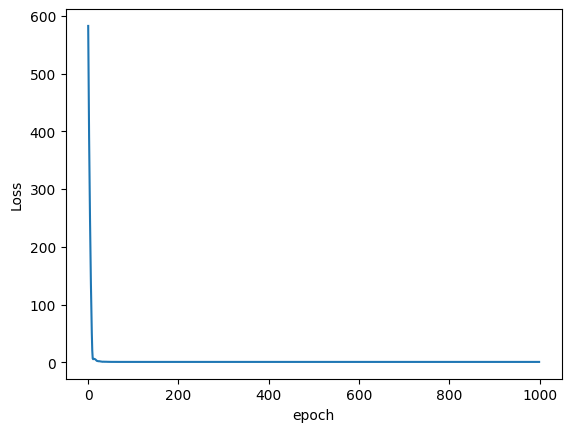

In [21]:
plt.plot(range(epochs),losses)
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.show()

***Evaluating the model***

**Evaluating the model on the test data and calculating the loss**

In [22]:
with torch.no_grad():
    y_eval=model.forward(X_test)
    loss=crit(y_eval,y_test)


In [23]:
loss

tensor(0.5206)